# HotSnack Delivery Platform Sample Analysis

Hello! Welcome to my sample analysis for a last mile logistics HotSnack delivery platform based in LA. <br>

**Dataset assumptions:**
- Contains ~1 month of data
- Date information is currently in UTC; the platform operates in PST 
- The dataset needs to be analyzed quickly and the C-suite is looking for data-driven reccomendations where clarity on the dataset cannot be investigated (i.e. updating null values)
- The delivery platform launched in 2022

The following analysis will look to showcase the following skillset:
- 🎯 **Structuring Problems:** Demonstrate how I structure my thoughts and approach problems 
- 📊 **Data Analytics Knowledge:** Ability to utilize 🐍 python and 🐼 pandas to clean and analyze data
- 🔥 **Providing Data-driven Insights:** Ability to dive into the root cause and provide actionable recommendations 

In [1]:
%matplotlib inline

**Importing Key Libraries**

- **pandas** - library that is used for loading and displaying date within a table <br>
- **numpy** - library that uses linear algebra functions and operations <br>
- **matplotlib and seaborn** - library that helps plot data <br>
- **datetime and time** - library that provides date ranges <br>

In [2]:
import pandas as pd
from datetime import datetime as dt
import datetime
import time
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

### Data Cleaning
In this section, I will load and clean the dataset by converting datetime related fields and adding additional columns (such as Tip % and discount %).

In [3]:
#Pulling data from xlsx source
df = pd.DataFrame(pd.read_csv('Delivery Platform 1 month Dataset.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15951 entries, 0 to 15950
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Order_placed_by_customer_timestamp  15951 non-null  object 
 1   Order_placed_with_store_timestamp   15915 non-null  object 
 2   Courier_at_store_timestamp          11963 non-null  object 
 3   Delivered_to_customer_datetime      15951 non-null  object 
 4   Courier_ID                          15951 non-null  int64  
 5   Store_ID                            15951 non-null  int64  
 6   Customer_ID                         15951 non-null  int64  
 7   Delivery_Zone                       15951 non-null  object 
 8   ASAP?                               15951 non-null  bool   
 9   Total_order                         15951 non-null  float64
 10  Discounted_amount                   15951 non-null  float64
 11  Tip                                 15951

In [4]:
#Renamed column to make it easier to analyze dataset as "?" characters are hard to apply within the code

df=df.rename(columns={
    "ASAP?": "Is_ASAP_Order"
})

*Note: Null values appear in two key timestamp related columns, when the order is placed with the store and when the courier is at the store. May affect time step related analysis.*

In [5]:
#Null values appear in the "Order_placed_with_store_timestamp" and "Courier_at_store_timestamp"

df.isnull().sum()

Order_placed_by_customer_timestamp       0
Order_placed_with_store_timestamp       36
Courier_at_store_timestamp            3988
Delivered_to_customer_datetime           0
Courier_ID                               0
Store_ID                                 0
Customer_ID                              0
Delivery_Zone                            0
Is_ASAP_Order                            0
Total_order                              0
Discounted_amount                        0
Tip                                      0
Refund_total                             0
dtype: int64

In [6]:
#Adding inital columns to help analyze Tip % both from a revenue and temporal perspective
df['Tip_%'] = df['Tip'] / df['Total_order'] * 100
df['Tip_%'] = df['Tip_%'].round(2)

In [7]:
df[df['Is_ASAP_Order']==True]

,Order_placed_by_customer_timestamp,Order_placed_with_store_timestamp,Courier_at_store_timestamp,Delivered_to_customer_datetime,Courier_ID,Store_ID,Customer_ID,Delivery_Zone,Is_ASAP_Order,Total_order,Discounted_amount,Tip,Refund_total,Tip_%
0,13 15:58:57,13 17:56:45,13 18:24:39,13 18:57:01,303,96,64746,Downtown LA,True,76.01,0.0,6.535,0.0,8.60
1,17 19:02:37,17 19:12:51,17 19:19:59,17 19:31:09,212,190,12484,Echo Park,True,16.64,6.0,2.605,0.0,15.66
2,08 23:46:38,08 23:49:32,08 23:54:29,09 00:37:15,313,9,7037,Downtown LA,True,51.44,0.0,5.245,0.0,10.20
3,12 03:54:30,12 03:57:30,12 04:10:26,12 04:41:00,314,350,95392,Downtown LA,True,16.04,6.0,0.955,0.0,5.95
4,12 04:14:15,12 04:14:41,12 04:25:32,12 04:53:25,154,27,7426,Downtown LA,True,48.66,0.0,5.985,0.0,12.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15944,30 03:15:46,30 03:21:23,30 03:31:42,30 03:59:13,198,20,104692,Downtown LA,True,52.96,0.0,2.245,0.0,4.24
15946,30 04:28:10,30 04:29:52,NaN,30 04:58:44,287,44,46332,Santa Monica,True,44.86,0.0,6.085,0.0,13.56
15947,30 18:33:19,30 18:50:06,30 19:08:19,30 19:20:41,184,44,11055,Santa Monica,True,35.67,0.0,5.085,0.0,14.26
15949,30 18:25:36,30 18:34:26,30 19:21:52,30 19:45:36,399,353,2643,Downtown LA,True,123.56,0.0,5.215,0.0,4.22


In [8]:
#Adding inital columns to help analyze Tip % both from a revenue and temporal perspective
df['Discount_%'] = df['Discounted_amount'] / df['Total_order'] * 100
df['Discount_%'] = df['Discount_%'].round(2)

**Datatime conversion:** Since the month and year are not provided, I will split out the day for day trends and convert the entire column datetime columns from object to datetime in the day, hour, minute, second format. The dataset is currently in UTC and we operate on PT. Since the delivery platform operates in PT, I will convert the time region from UTC to US/Pacific time. This will assist with making sense of time related data.



In [11]:
#Converting the datetime columns from objects to datetime objects.
df['Order_placed_by_customer_timestamp'] = pd.to_datetime(df['Order_placed_by_customer_timestamp'], format= '%d %H:%M:%S')
df['Order_placed_with_store_timestamp'] = pd.to_datetime(df['Order_placed_with_store_timestamp'], format= '%d %H:%M:%S')
df['Courier_at_store_timestamp'] = pd.to_datetime(df['Courier_at_store_timestamp'], format= '%d %H:%M:%S')
df['Delivered_to_customer_datetime'] = pd.to_datetime(df['Delivered_to_customer_datetime'], format= '%d %H:%M:%S')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15951 entries, 0 to 15950
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Order_placed_by_customer_timestamp  15951 non-null  datetime64[ns]
 1   Order_placed_with_store_timestamp   15915 non-null  datetime64[ns]
 2   Courier_at_store_timestamp          11963 non-null  datetime64[ns]
 3   Delivered_to_customer_datetime      15951 non-null  datetime64[ns]
 4   Courier_ID                          15951 non-null  int64         
 5   Store_ID                            15951 non-null  int64         
 6   Customer_ID                         15951 non-null  int64         
 7   Delivery_Zone                       15951 non-null  object        
 8   Is_ASAP_Order                       15951 non-null  bool          
 9   Total_order                         15951 non-null  float64       
 10  Discounted_amount     

In [12]:
#Checking if datetime conversion worked
df[(df['Customer_ID'] == 10868)]

,Order_placed_by_customer_timestamp,Order_placed_with_store_timestamp,Courier_at_store_timestamp,Delivered_to_customer_datetime,Courier_ID,Store_ID,Customer_ID,Delivery_Zone,Is_ASAP_Order,Total_order,Discounted_amount,Tip,Refund_total,Tip_%,Discount_%,Day,Timestamp
1030,1900-01-31 23:58:34,1900-01-01 00:00:51,1900-01-01 00:10:59,1900-01-01 00:46:20,288,232,10868,Downtown LA,True,37.35,0.0,1.955,0.0,5.23,0.0,01,00:46:20


In [13]:
#Converting time from UTC to PT
from pytz import timezone

df["Order_placed_by_customer_timestamp"] = df["Order_placed_by_customer_timestamp"].dt.tz_localize('UTC').dt.tz_convert('PST8PDT').dt.tz_localize(None)
df["Order_placed_with_store_timestamp"] = df["Order_placed_with_store_timestamp"].dt.tz_localize('UTC').dt.tz_convert('PST8PDT').dt.tz_localize(None)
df["Courier_at_store_timestamp"] = df["Courier_at_store_timestamp"].dt.tz_localize('UTC').dt.tz_convert('PST8PDT').dt.tz_localize(None)
df["Delivered_to_customer_datetime"] = df["Delivered_to_customer_datetime"].dt.tz_localize('UTC').dt.tz_convert('PST8PDT').dt.tz_localize(None)

In [14]:
df.loc[1168]

Order_placed_by_customer_timestamp    1900-01-01 11:03:59
Order_placed_with_store_timestamp     1900-01-01 11:08:35
Courier_at_store_timestamp            1900-01-01 11:28:26
Delivered_to_customer_datetime        1900-01-01 11:48:52
Courier_ID                                            184
Store_ID                                              342
Customer_ID                                          4097
Delivery_Zone                                Santa Monica
Is_ASAP_Order                                        True
Total_order                                         53.07
Discounted_amount                                     0.0
Tip                                                 2.255
Refund_total                                          0.0
Tip_%                                                4.25
Discount_%                                            0.0
Day                                                    01
Timestamp                                        19:48:52
Name: 1168, dt

In [15]:
#Collecting totals of relevent one month data
df[['Total_order', 'Discounted_amount', 'Tip', 'Refund_total']].sum()

Total_order          813848.130
Discounted_amount     21690.940
Tip                   56762.255
Refund_total           9825.520
dtype: float64

The delivery platform is performing well with **$814K in total revenue** across the three delivery regions.

### Data Analysis: Temporal Analysis
**Assumption 1**: Normally, I would want to consult with the team to see why we are seeing null values for the "Order placed with store timestamp" and "Courier at store timestamp" fields, however, I will drop these rows for the temporal analysis of orders and analyze full dataset later in the analysis. This analysis will give be a clearer picture of the time between each step of the process.

In [16]:
#Removed null values for Temporal (time) analysis
dd = df.copy()
dd = dd.dropna()
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11941 entries, 0 to 15950
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Order_placed_by_customer_timestamp  11941 non-null  datetime64[ns]
 1   Order_placed_with_store_timestamp   11941 non-null  datetime64[ns]
 2   Courier_at_store_timestamp          11941 non-null  datetime64[ns]
 3   Delivered_to_customer_datetime      11941 non-null  datetime64[ns]
 4   Courier_ID                          11941 non-null  int64         
 5   Store_ID                            11941 non-null  int64         
 6   Customer_ID                         11941 non-null  int64         
 7   Delivery_Zone                       11941 non-null  object        
 8   Is_ASAP_Order                       11941 non-null  bool          
 9   Total_order                         11941 non-null  float64       
 10  Discounted_amount     

In [17]:
#Finding the time delta to understand how long each process takes
dd['Cust_to_store'] = dd['Order_placed_with_store_timestamp'] - dd['Order_placed_by_customer_timestamp']
dd['Store_to_cour'] = dd['Courier_at_store_timestamp'] - dd['Order_placed_with_store_timestamp']
dd['Cour_to_Cust'] = dd['Delivered_to_customer_datetime'] - dd['Courier_at_store_timestamp']
dd['Total_time'] = dd['Delivered_to_customer_datetime'] - dd['Order_placed_by_customer_timestamp']
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11941 entries, 0 to 15950
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Order_placed_by_customer_timestamp  11941 non-null  datetime64[ns] 
 1   Order_placed_with_store_timestamp   11941 non-null  datetime64[ns] 
 2   Courier_at_store_timestamp          11941 non-null  datetime64[ns] 
 3   Delivered_to_customer_datetime      11941 non-null  datetime64[ns] 
 4   Courier_ID                          11941 non-null  int64          
 5   Store_ID                            11941 non-null  int64          
 6   Customer_ID                         11941 non-null  int64          
 7   Delivery_Zone                       11941 non-null  object         
 8   Is_ASAP_Order                       11941 non-null  bool           
 9   Total_order                         11941 non-null  float64        
 10  Discounted

Based on the datetime64 conversion, the year and month are set to '1899' and '1900'. As the dataset takes place in Delivery platform launched around 2022, I have converted the year to 2021 - 2022.

In [18]:
#Checking 1899 timestamps
dd.head(1)

,Order_placed_by_customer_timestamp,Order_placed_with_store_timestamp,Courier_at_store_timestamp,Delivered_to_customer_datetime,Courier_ID,Store_ID,Customer_ID,Delivery_Zone,Is_ASAP_Order,Total_order,...,Tip,Refund_total,Tip_%,Discount_%,Day,Timestamp,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
0,1900-01-13 07:58:57,1900-01-13 09:56:45,1900-01-13 10:24:39,1900-01-13 10:57:01,303,96,64746,Downtown LA,True,76.01,...,6.535,0.0,8.6,0.0,13,18:57:01,0 days 01:57:48,0 days 00:27:54,0 days 00:32:22,0 days 02:58:04


In [19]:
#Converting year from 1899-1900 to 2022-2023
dd['Order_placed_by_customer_timestamp'] = dd['Order_placed_by_customer_timestamp'] + pd.offsets.DateOffset(years=122)
dd['Order_placed_with_store_timestamp'] = dd['Order_placed_with_store_timestamp'] + pd.offsets.DateOffset(years=122)
dd['Courier_at_store_timestamp'] = dd['Courier_at_store_timestamp'] + pd.offsets.DateOffset(years=122)
dd['Delivered_to_customer_datetime'] = dd['Delivered_to_customer_datetime'] + pd.offsets.DateOffset(years=122)
dd.head(1)

,Order_placed_by_customer_timestamp,Order_placed_with_store_timestamp,Courier_at_store_timestamp,Delivered_to_customer_datetime,Courier_ID,Store_ID,Customer_ID,Delivery_Zone,Is_ASAP_Order,Total_order,...,Tip,Refund_total,Tip_%,Discount_%,Day,Timestamp,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
0,2022-01-13 07:58:57,2022-01-13 09:56:45,2022-01-13 10:24:39,2022-01-13 10:57:01,303,96,64746,Downtown LA,True,76.01,...,6.535,0.0,8.6,0.0,13,18:57:01,0 days 01:57:48,0 days 00:27:54,0 days 00:32:22,0 days 02:58:04


In [20]:
#How many of our orders are ASAP deliveries?
dd.Is_ASAP_Order.value_counts()

True     9591
False    2350
Name: Is_ASAP_Order, dtype: int64

In [21]:
dd[dd['Is_ASAP_Order']==False].describe()

,Courier_ID,Store_ID,Customer_ID,Total_order,Discounted_amount,Tip,Refund_total,Tip_%,Discount_%,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350,2350,2350,2350
mean,219.825957,92.746383,25858.644681,76.909323,0.982979,4.960549,1.113136,6.773123,2.398962,-1 days +21:30:15.322978724,-1 days +21:44:22.674893618,-1 days +23:25:48.103404256,-1 days +18:40:26.101276596
std,106.486801,93.322452,36873.410660,75.573113,3.765461,5.900095,10.752359,3.797739,9.192716,2 days 12:55:09.520862328,1 days 21:57:29.883346904,1 days 02:34:17.794144625,3 days 08:31:40.384911762
min,7.000000,2.000000,14.000000,8.030000,0.000000,0.000000,0.000000,0.000000,0.000000,-31 days +00:14:47,-31 days +00:11:53,-31 days +00:17:12,-31 days +00:41:46
25%,134.500000,15.000000,3396.000000,31.430000,0.000000,1.795000,0.000000,4.270000,0.000000,0 days 00:14:35.500000,0 days 00:17:23.250000,0 days 00:15:56,0 days 01:07:37
50%,222.000000,63.000000,9051.000000,51.980000,0.000000,3.365000,0.000000,5.200000,0.000000,0 days 00:37:02.500000,0 days 00:27:09,0 days 00:20:37.500000,0 days 01:31:06.500000
75%,314.000000,123.000000,29544.000000,91.052500,0.000000,6.210000,0.000000,8.740000,0.000000,0 days 01:19:40.750000,0 days 00:41:46.750000,0 days 00:27:09,0 days 02:14:29.500000
max,438.000000,401.000000,200285.000000,884.050000,77.720000,120.385000,415.120000,29.660000,100.710000,4 days 01:48:55,1 days 05:45:35,0 days 02:30:44,4 days 06:02:27


**Note**: Since the dataset does not provide the month, Python will only recognize days based on the 'current' month. I will remove the list of outliers for temporal analysis. Usually there would be month and year data associated with the dataset and I would investigate further.




In [22]:
dd.Cust_to_store.idxmin()
dd.loc[1030]

Order_placed_by_customer_timestamp    2022-01-31 15:58:34
Order_placed_with_store_timestamp     2021-12-31 16:00:51
Courier_at_store_timestamp            2021-12-31 16:10:59
Delivered_to_customer_datetime        2021-12-31 16:46:20
Courier_ID                                            288
Store_ID                                              232
Customer_ID                                         10868
Delivery_Zone                                 Downtown LA
Is_ASAP_Order                                        True
Total_order                                         37.35
Discounted_amount                                     0.0
Tip                                                 1.955
Refund_total                                          0.0
Tip_%                                                5.23
Discount_%                                            0.0
Day                                                    01
Timestamp                                        00:46:20
Cust_to_store 

In [23]:
#Delivery Region Check
dd.groupby(['Delivery_Zone'])['Total_order'].count()

Delivery_Zone
Downtown LA     7624
Echo Park       1868
None              13
Santa Monica    2436
Name: Total_order, dtype: int64

In [24]:
#Customer_ID only appears in 'None' Delivery Zone once nulls are dropped AND these are for scheduled on-demand orders
dd[dd['Customer_ID']== 10294]

,Order_placed_by_customer_timestamp,Order_placed_with_store_timestamp,Courier_at_store_timestamp,Delivered_to_customer_datetime,Courier_ID,Store_ID,Customer_ID,Delivery_Zone,Is_ASAP_Order,Total_order,...,Tip,Refund_total,Tip_%,Discount_%,Day,Timestamp,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
750,2022-01-21 08:20:33,2022-01-21 10:07:40,2022-01-21 10:50:57,2022-01-21 11:16:56,48,200,10294,None,False,45.45,...,4.085,0.00,8.99,0.0,21,19:16:56,0 days 01:47:07,0 days 00:43:17,0 days 00:25:59,0 days 02:56:23
1276,2022-01-07 08:13:34,2022-01-07 10:25:55,2022-01-07 11:10:43,2022-01-07 11:32:34,305,80,10294,None,False,139.07,...,10.085,0.00,7.25,0.0,07,19:32:34,0 days 02:12:21,0 days 00:44:48,0 days 00:21:51,0 days 03:19:00
1464,2022-01-10 08:05:16,2022-01-10 09:48:15,2022-01-10 10:05:25,2022-01-10 10:46:13,34,9,10294,None,False,99.29,...,10.085,0.00,10.16,0.0,10,18:46:13,0 days 01:42:59,0 days 00:17:10,0 days 00:40:48,0 days 02:40:57
5365,2022-01-08 08:08:11,2022-01-08 10:33:46,2022-01-08 10:47:05,2022-01-08 11:26:02,34,200,10294,None,False,81.83,...,8.085,0.00,9.88,0.0,08,19:26:02,0 days 02:25:35,0 days 00:13:19,0 days 00:38:57,0 days 03:17:51
6535,2022-01-16 08:24:25,2022-01-16 10:10:12,2022-01-16 10:36:12,2022-01-16 11:23:23,267,63,10294,None,False,62.58,...,10.085,23.62,16.12,0.0,16,19:23:23,0 days 01:45:47,0 days 00:26:00,0 days 00:47:11,0 days 02:58:58
9716,2022-01-22 08:12:22,2022-01-22 09:14:24,2022-01-22 10:22:32,2022-01-22 10:51:10,34,312,10294,None,False,111.05,...,10.085,0.00,9.08,0.0,22,18:51:10,0 days 01:02:02,0 days 01:08:08,0 days 00:28:38,0 days 02:38:48
10099,2022-01-01 08:05:00,2022-01-01 09:18:02,2022-01-01 11:03:14,2022-01-01 11:20:21,60,8,10294,None,False,155.53,...,10.085,0.00,6.48,0.0,01,19:20:21,0 days 01:13:02,0 days 01:45:12,0 days 00:17:07,0 days 03:15:21
10164,2022-01-03 08:20:15,2022-01-03 09:30:10,2022-01-03 11:04:08,2022-01-03 11:24:40,259,312,10294,None,False,110.51,...,10.085,0.00,9.13,0.0,03,19:24:40,0 days 01:09:55,0 days 01:33:58,0 days 00:20:32,0 days 03:04:25
10790,2022-01-24 08:01:59,2022-01-24 09:31:04,2022-01-24 10:06:52,2022-01-24 10:39:39,34,213,10294,None,False,88.74,...,8.085,0.00,9.11,0.0,24,18:39:39,0 days 01:29:05,0 days 00:35:48,0 days 00:32:47,0 days 02:37:40
13563,2022-01-18 08:03:52,2022-01-18 09:43:28,2022-01-18 10:05:39,2022-01-18 10:28:28,114,312,10294,None,False,83.24,...,8.085,0.00,9.71,0.0,18,18:28:28,0 days 01:39:36,0 days 00:22:11,0 days 00:22:49,0 days 02:24:36


In [25]:
#Converting timedelta's to minutes
dd['Cust_to_store'] = dd['Cust_to_store'] / np.timedelta64(1, 'm')
dd['Store_to_cour'] = dd['Store_to_cour'] / np.timedelta64(1, 'm')
dd['Cour_to_Cust'] = dd['Cour_to_Cust'] / np.timedelta64(1, 'm')
dd['Total_time'] = dd['Total_time'] / np.timedelta64(1, 'm')

In [26]:
#Checking if minute conversion worked
dd.head(1)

,Order_placed_by_customer_timestamp,Order_placed_with_store_timestamp,Courier_at_store_timestamp,Delivered_to_customer_datetime,Courier_ID,Store_ID,Customer_ID,Delivery_Zone,Is_ASAP_Order,Total_order,...,Tip,Refund_total,Tip_%,Discount_%,Day,Timestamp,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
0,2022-01-13 07:58:57,2022-01-13 09:56:45,2022-01-13 10:24:39,2022-01-13 10:57:01,303,96,64746,Downtown LA,True,76.01,...,6.535,0.0,8.6,0.0,13,18:57:01,117.8,27.9,32.366667,178.066667


In [27]:
#Filtered out negative time deltas
samemonth = dd[(dd['Cust_to_store'] > 0)&(dd['Store_to_cour'] > 0)&(dd['Cour_to_Cust'] > 0) & (dd['Total_time'] > 0)]
samemonth

,Order_placed_by_customer_timestamp,Order_placed_with_store_timestamp,Courier_at_store_timestamp,Delivered_to_customer_datetime,Courier_ID,Store_ID,Customer_ID,Delivery_Zone,Is_ASAP_Order,Total_order,...,Tip,Refund_total,Tip_%,Discount_%,Day,Timestamp,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
0,2022-01-13 07:58:57,2022-01-13 09:56:45,2022-01-13 10:24:39,2022-01-13 10:57:01,303,96,64746,Downtown LA,True,76.01,...,6.535,0.0,8.60,0.00,13,18:57:01,117.800000,27.900000,32.366667,178.066667
1,2022-01-17 11:02:37,2022-01-17 11:12:51,2022-01-17 11:19:59,2022-01-17 11:31:09,212,190,12484,Echo Park,True,16.64,...,2.605,0.0,15.66,36.06,17,19:31:09,10.233333,7.133333,11.166667,28.533333
2,2022-01-08 15:46:38,2022-01-08 15:49:32,2022-01-08 15:54:29,2022-01-08 16:37:15,313,9,7037,Downtown LA,True,51.44,...,5.245,0.0,10.20,0.00,09,00:37:15,2.900000,4.950000,42.766667,50.616667
3,2022-01-11 19:54:30,2022-01-11 19:57:30,2022-01-11 20:10:26,2022-01-11 20:41:00,314,350,95392,Downtown LA,True,16.04,...,0.955,0.0,5.95,37.41,12,04:41:00,3.000000,12.933333,30.566667,46.500000
4,2022-01-11 20:14:15,2022-01-11 20:14:41,2022-01-11 20:25:32,2022-01-11 20:53:25,154,27,7426,Downtown LA,True,48.66,...,5.985,0.0,12.30,0.00,12,04:53:25,0.433333,10.850000,27.883333,39.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15944,2022-01-29 19:15:46,2022-01-29 19:21:23,2022-01-29 19:31:42,2022-01-29 19:59:13,198,20,104692,Downtown LA,True,52.96,...,2.245,0.0,4.24,0.00,30,03:59:13,5.616667,10.316667,27.516667,43.450000
15947,2022-01-30 10:33:19,2022-01-30 10:50:06,2022-01-30 11:08:19,2022-01-30 11:20:41,184,44,11055,Santa Monica,True,35.67,...,5.085,0.0,14.26,0.00,30,19:20:41,16.783333,18.216667,12.366667,47.366667
15948,2022-01-30 09:40:02,2022-01-30 10:06:01,2022-01-30 10:22:25,2022-01-30 10:40:20,232,330,24289,Echo Park,False,29.20,...,1.155,0.0,3.96,0.00,30,18:40:20,25.983333,16.400000,17.916667,60.300000
15949,2022-01-30 10:25:36,2022-01-30 10:34:26,2022-01-30 11:21:52,2022-01-30 11:45:36,399,353,2643,Downtown LA,True,123.56,...,5.215,0.0,4.22,0.00,30,19:45:36,8.833333,47.433333,23.733333,80.000000


In [28]:
#Filtering for ASAP orders only (for True on-demand orders)
samemonth = samemonth[samemonth['Is_ASAP_Order'] ==True]
samemonth

,Order_placed_by_customer_timestamp,Order_placed_with_store_timestamp,Courier_at_store_timestamp,Delivered_to_customer_datetime,Courier_ID,Store_ID,Customer_ID,Delivery_Zone,Is_ASAP_Order,Total_order,...,Tip,Refund_total,Tip_%,Discount_%,Day,Timestamp,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
0,2022-01-13 07:58:57,2022-01-13 09:56:45,2022-01-13 10:24:39,2022-01-13 10:57:01,303,96,64746,Downtown LA,True,76.01,...,6.535,0.0,8.60,0.00,13,18:57:01,117.800000,27.900000,32.366667,178.066667
1,2022-01-17 11:02:37,2022-01-17 11:12:51,2022-01-17 11:19:59,2022-01-17 11:31:09,212,190,12484,Echo Park,True,16.64,...,2.605,0.0,15.66,36.06,17,19:31:09,10.233333,7.133333,11.166667,28.533333
2,2022-01-08 15:46:38,2022-01-08 15:49:32,2022-01-08 15:54:29,2022-01-08 16:37:15,313,9,7037,Downtown LA,True,51.44,...,5.245,0.0,10.20,0.00,09,00:37:15,2.900000,4.950000,42.766667,50.616667
3,2022-01-11 19:54:30,2022-01-11 19:57:30,2022-01-11 20:10:26,2022-01-11 20:41:00,314,350,95392,Downtown LA,True,16.04,...,0.955,0.0,5.95,37.41,12,04:41:00,3.000000,12.933333,30.566667,46.500000
4,2022-01-11 20:14:15,2022-01-11 20:14:41,2022-01-11 20:25:32,2022-01-11 20:53:25,154,27,7426,Downtown LA,True,48.66,...,5.985,0.0,12.30,0.00,12,04:53:25,0.433333,10.850000,27.883333,39.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15943,2022-01-29 19:06:19,2022-01-29 19:08:57,2022-01-29 19:17:28,2022-01-29 19:49:47,259,9,3711,Downtown LA,True,30.34,...,0.000,0.0,0.00,0.00,30,03:49:47,2.633333,8.516667,32.316667,43.466667
15944,2022-01-29 19:15:46,2022-01-29 19:21:23,2022-01-29 19:31:42,2022-01-29 19:59:13,198,20,104692,Downtown LA,True,52.96,...,2.245,0.0,4.24,0.00,30,03:59:13,5.616667,10.316667,27.516667,43.450000
15947,2022-01-30 10:33:19,2022-01-30 10:50:06,2022-01-30 11:08:19,2022-01-30 11:20:41,184,44,11055,Santa Monica,True,35.67,...,5.085,0.0,14.26,0.00,30,19:20:41,16.783333,18.216667,12.366667,47.366667
15949,2022-01-30 10:25:36,2022-01-30 10:34:26,2022-01-30 11:21:52,2022-01-30 11:45:36,399,353,2643,Downtown LA,True,123.56,...,5.215,0.0,4.22,0.00,30,19:45:36,8.833333,47.433333,23.733333,80.000000


In [29]:
#Describe key numerical data (order totals, discounts, tips, refunds, and TIME)
samemonth[['Total_order', 'Discounted_amount', 'Tip', 'Refund_total', 'Cust_to_store','Store_to_cour', 'Cour_to_Cust', 'Total_time']].describe()

,Total_order,Discounted_amount,Tip,Refund_total,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
count,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000
mean,44.166577,1.458810,3.220653,0.421058,6.878595,14.982247,24.380724,46.241566
std,28.980007,6.954742,2.716649,3.704397,42.673021,9.783049,10.481664,46.335879
min,3.080000,0.000000,0.000000,0.000000,0.116667,0.016667,0.650000,9.883333
25%,25.930000,0.000000,1.455000,0.000000,1.133333,8.366667,17.216667,34.766667
50%,36.750000,0.000000,2.475000,0.000000,2.966667,12.433333,22.550000,43.200000
75%,52.850000,0.000000,4.205000,0.000000,7.883333,18.900000,29.733333,54.316667
max,548.880000,162.890000,32.815000,96.540000,4079.966667,189.200000,168.183333,4308.116667


In [30]:
#It took close to 3 days to get an order delivered! Let's look
samemonth['Cust_to_store'].idxmax()
samemonth.loc[8351]

Order_placed_by_customer_timestamp    2022-01-09 16:08:16
Order_placed_with_store_timestamp     2022-01-12 12:08:14
Courier_at_store_timestamp            2022-01-12 15:17:26
Delivered_to_customer_datetime        2022-01-12 15:56:23
Courier_ID                                            216
Store_ID                                                9
Customer_ID                                         85535
Delivery_Zone                                 Downtown LA
Is_ASAP_Order                                        True
Total_order                                        357.91
Discounted_amount                                     6.0
Tip                                                15.995
Refund_total                                          0.0
Tip_%                                                4.47
Discount_%                                           1.68
Day                                                    12
Timestamp                                        23:56:23
Cust_to_store 

*Assumption:* The main outlier from a time perspective is related to a Customer placing an order and the Store receiving the order. Since there was no request for refund and other step processes were effected. I will consider this a data issue. In the real world, we would need to make sure Customer placed orders times are accurate

In [31]:
#Removing extreme outlier for temporal analysis
sm = samemonth[samemonth['Cust_to_store'] < 4000]
sm.describe()

,Courier_ID,Store_ID,Customer_ID,Total_order,Discounted_amount,Tip,Refund_total,Tip_%,Discount_%,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
count,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000
mean,224.273378,109.459667,31744.464090,44.133537,1.458332,3.219308,0.421103,7.374238,3.697948,6.449668,14.963901,24.379189,45.792758
std,104.116613,98.549409,39874.523303,28.802103,6.954952,2.713627,3.704590,4.227079,11.842744,8.588029,9.618793,10.481150,15.299537
min,7.000000,2.000000,5.000000,3.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116667,0.016667,0.650000,9.883333
25%,145.000000,26.000000,4405.250000,25.930000,0.000000,1.455000,0.000000,4.240000,0.000000,1.133333,8.366667,17.216667,34.766667
50%,229.000000,77.000000,11337.000000,36.750000,0.000000,2.475000,0.000000,5.380000,0.000000,2.966667,12.433333,22.541667,43.200000
75%,314.000000,188.000000,57966.000000,52.767500,0.000000,4.197500,0.000000,10.242500,0.000000,7.883333,18.900000,29.720833,54.316667
max,438.000000,407.000000,200449.000000,548.880000,162.890000,32.815000,96.540000,44.510000,101.270000,117.800000,80.833333,168.183333,188.033333


In [32]:
#Pulling key numerical data (tips, orders, and time) based on Delivery Zone
d = {
    'Tip_%': 'Avg_Tip_pct', 
    'Total_order':'Avg_Order',
    'Total_time':'Avg_total_time', 
    'Delivery_Zone' : 'Order_count'}
region_chart = sm.groupby('Delivery_Zone').agg({
    'Tip_%' : 'mean', 
    'Total_order':'median', 
    'Cust_to_store':'mean', 
    'Store_to_cour': 'mean', 
    'Cour_to_Cust': 'mean', 
    'Total_time': 'mean', 
    'Delivery_Zone':'count'
}).rename(columns=d).round(2)


region_chart

,Avg_Tip_pct,Avg_Order,Cust_to_store,Store_to_cour,Cour_to_Cust,Avg_total_time,Order_count
Delivery_Zone,,,,,,,
Downtown LA,7.04,36.21,5.89,14.39,24.59,44.87,5896
Echo Park,8.47,37.43,6.80,16.75,24.96,48.50,1632
Santa Monica,7.46,37.35,7.85,15.20,23.27,46.32,1968


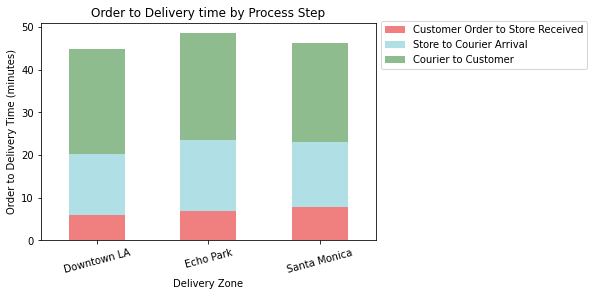

In [33]:
#Creating Stacked Bar Chart for Delivery Time Averages
rc = region_chart[['Cust_to_store','Store_to_cour', 'Cour_to_Cust']]
rc.plot.bar(stacked=True,rot=15, 
            title="Order to Delivery time by Process Step", 
            ylabel='Order to Delivery Time (minutes)', 
            xlabel='Delivery Zone',
           color=['lightcoral', 'powderblue', 'darkseagreen'])

plt.legend(['Customer Order to Store Received', 'Store to Courier Arrival', 'Courier to Customer'], loc='center left', bbox_to_anchor=(1, .9))
plt.show(block=True);

In [34]:
sm.groupby(['Delivery_Zone'])['Total_order'].sum()

Delivery_Zone
Downtown LA     261142.82
Echo Park        68426.58
Santa Monica     89522.67
Name: Total_order, dtype: float64

**Reccomendation #1**
- Step 1 Improvement: Improve API for sending Customer orders to Stores <br>
    - Fix data issues on timestamp tracking (Customer ID 85535 order took 3 days) <br>
- Step 2: Improve algorithm on matching Couriers to Stores based on proximity <br>
- Step 3: Step 3: Match Couriers to Customers based on proximity and conditions (i.e. .5 mile radius delivery may be quicker on bike or foot during rush hour)<br>

*Note*: Courier to Customer may be challenging due to traffic and weather

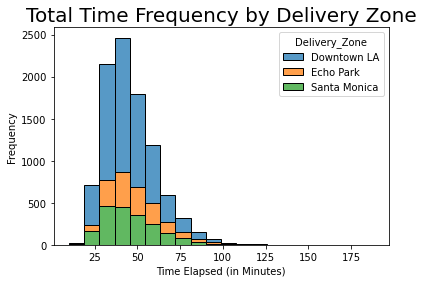

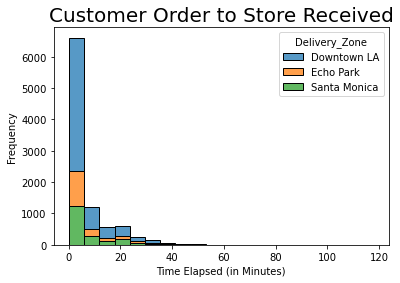

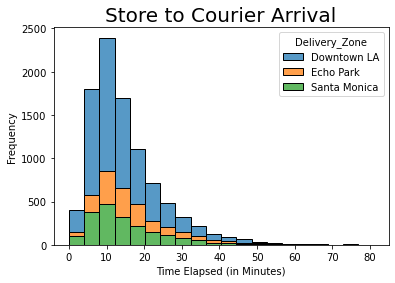

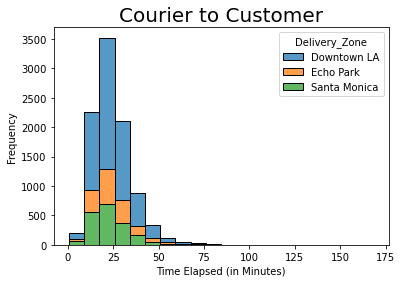

In [35]:
#Histogram on time frequency for each stage of delivery by delivery zone
sns.histplot(data=sm, x="Total_time", bins=20, hue="Delivery_Zone", multiple="stack")
plt.title("Total Time Frequency by Delivery Zone",size=20)
plt.ylabel("Frequency",size=10)
plt.xlabel("Time Elapsed (in Minutes)",size=10)
plt.show()

sns.histplot(data=sm, x="Cust_to_store", bins=20, hue="Delivery_Zone", multiple="stack")
plt.title("Customer Order to Store Received",size=20)
plt.ylabel("Frequency",size=10)
plt.xlabel("Time Elapsed (in Minutes)",size=10)
plt.show()

sns.histplot(data=sm, x="Store_to_cour", bins=20, hue="Delivery_Zone", multiple="stack")
plt.title("Store to Courier Arrival",size=20)
plt.ylabel("Frequency",size=10)
plt.xlabel("Time Elapsed (in Minutes)",size=10)
plt.show()

sns.histplot(data=sm, x="Cour_to_Cust", bins=20, hue="Delivery_Zone", multiple="stack")
plt.title("Courier to Customer",size=20)
plt.ylabel("Frequency",size=10)
plt.xlabel("Time Elapsed (in Minutes)",size=10)
plt.show()

#### Temporal Analysis related to Refunded Orders

In [36]:
sm['Refund_total'].count()

9496

In [37]:
#Look at refund data based on amounts greater than 0
refund = sm[['Refund_total','Delivery_Zone', 'Customer_ID', 'Courier_ID', 'Total_time','Total_order','Order_placed_by_customer_timestamp']]
refund = refund[refund['Refund_total'] > 0]

refund

,Refund_total,Delivery_Zone,Customer_ID,Courier_ID,Total_time,Total_order,Order_placed_by_customer_timestamp
113,15.81,Downtown LA,2768,343,55.483333,25.88,2022-01-12 19:19:06
148,10.08,Downtown LA,75380,314,39.116667,38.88,2021-12-31 18:42:57
266,19.34,Santa Monica,2026,290,122.016667,17.29,2022-01-04 11:04:21
337,10.35,Downtown LA,27808,346,86.366667,55.68,2022-01-06 16:10:23
499,19.53,Downtown LA,2796,345,65.016667,67.75,2022-01-12 17:28:49
...,...,...,...,...,...,...,...
15295,33.61,Downtown LA,4059,99,40.566667,50.08,2022-01-06 18:24:15
15416,1.16,Downtown LA,14509,144,33.983333,16.23,2022-01-10 12:25:00
15709,19.81,Downtown LA,5821,320,28.550000,25.34,2022-01-21 19:03:41
15795,13.29,Downtown LA,6555,41,57.216667,41.59,2022-01-24 17:44:11


In [38]:
#Understand the subdata set of orders related to refunds
refund.describe()

,Refund_total,Customer_ID,Courier_ID,Total_time,Total_order
count,213.000000,213.000000,213.000000,213.000000,213.000000
mean,18.773662,35600.854460,222.272300,53.526604,50.486995
std,16.385858,41291.675141,105.578554,19.985347,33.402200
min,0.570000,70.000000,7.000000,22.333333,14.520000
25%,7.910000,5913.000000,149.000000,38.966667,27.620000
50%,14.430000,12647.000000,214.000000,48.150000,42.250000
75%,23.370000,70575.000000,314.000000,63.383333,57.470000
max,96.540000,194942.000000,432.000000,122.016667,259.000000


In [39]:
#Understand the number of refunds by each Delivery Region
refund.groupby(['Delivery_Zone'])['Refund_total'].count()

Delivery_Zone
Downtown LA     106
Echo Park        51
Santa Monica     56
Name: Refund_total, dtype: int64

In [40]:
#Refresh on On-Demand data
sm.describe()

,Courier_ID,Store_ID,Customer_ID,Total_order,Discounted_amount,Tip,Refund_total,Tip_%,Discount_%,Cust_to_store,Store_to_cour,Cour_to_Cust,Total_time
count,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000
mean,224.273378,109.459667,31744.464090,44.133537,1.458332,3.219308,0.421103,7.374238,3.697948,6.449668,14.963901,24.379189,45.792758
std,104.116613,98.549409,39874.523303,28.802103,6.954952,2.713627,3.704590,4.227079,11.842744,8.588029,9.618793,10.481150,15.299537
min,7.000000,2.000000,5.000000,3.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116667,0.016667,0.650000,9.883333
25%,145.000000,26.000000,4405.250000,25.930000,0.000000,1.455000,0.000000,4.240000,0.000000,1.133333,8.366667,17.216667,34.766667
50%,229.000000,77.000000,11337.000000,36.750000,0.000000,2.475000,0.000000,5.380000,0.000000,2.966667,12.433333,22.541667,43.200000
75%,314.000000,188.000000,57966.000000,52.767500,0.000000,4.197500,0.000000,10.242500,0.000000,7.883333,18.900000,29.720833,54.316667
max,438.000000,407.000000,200449.000000,548.880000,162.890000,32.815000,96.540000,44.510000,101.270000,117.800000,80.833333,168.183333,188.033333


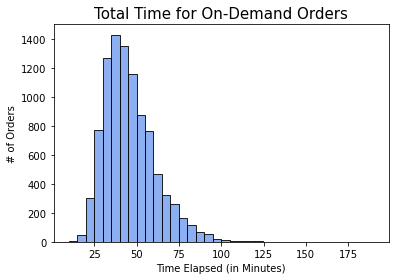

<Figure size 432x288 with 0 Axes>

In [41]:
#Created histogram of On-Demand orders to compare to Refunded orders histogram
sns.histplot (data=sm,
              x='Total_time', 
              color = 'cornflowerblue',
              binwidth = 5)
plt.title("Total Time for On-Demand Orders",size=15)
plt.ylabel("# of Orders",size=10)
plt.xlabel("Time Elapsed (in Minutes)",size=10)
plt.show()
plt.savefig('Total_Time_OD_Orders.png')

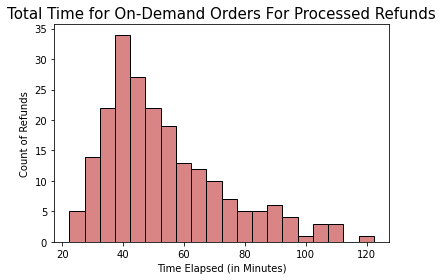

<Figure size 432x288 with 0 Axes>

In [42]:
#Create histogram for On-Demand Orders with Refunds
sns.histplot (data=refund,
              x='Total_time', 
              color = 'indianred',
              binwidth = 5)
plt.title("Total Time for On-Demand Orders For Processed Refunds",size=15)
plt.ylabel("Count of Refunds",size=10)
plt.xlabel("Time Elapsed (in Minutes)",size=10)
plt.show()
plt.savefig('Total_Time_OD_Orders_Refunds.png')

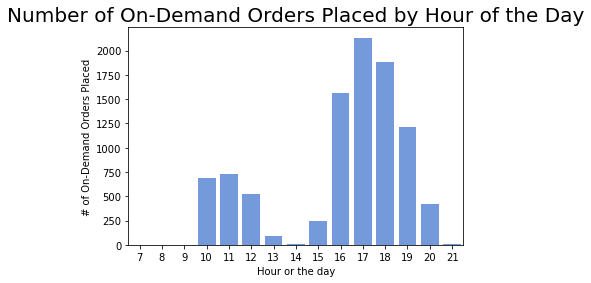

In [43]:
#Create Countplot of when on-demand orders are generated

od= sm["Order_placed_by_customer_timestamp"].dt.hour
import matplotlib.pyplot as plt
import seaborn as sns
#figure(figsize=(40,7))
#df=z.sort_values(by=['Customer_order_Timestamp_1'])
sns.countplot(x=od,data=od, color='cornflowerblue')
plt.title("Number of On-Demand Orders Placed by Hour of the Day",size=20)
plt.ylabel("# of On-Demand Orders Placed",size=10)
plt.xlabel("Hour or the day",size=10)

plt.show()


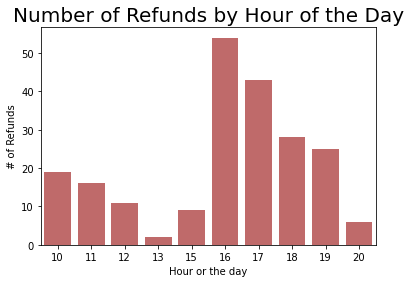

In [44]:
#Create Countplot of when number of refunds are generated

r= refund["Order_placed_by_customer_timestamp"].dt.hour
import matplotlib.pyplot as plt
import seaborn as sns
#figure(figsize=(40,7))
#df=z.sort_values(by=['Customer_order_Timestamp_1'])
sns.countplot(x=r,data=r, color='indianred')
plt.title("Number of Refunds by Hour of the Day",size=20)
plt.ylabel("# of Refunds",size=10)
plt.xlabel("Hour or the day",size=10)

plt.show()

In [45]:
#Find the percentage of orders associated with refunds -- i.e. Refund Rate
refundrate = refund.Total_order.count()/sm.Total_order.count() * 100
refundrate.round(2)

2.24

**Observation**: As both the refunds based chart and total time charts are skewed, the median is the best estimate for time comparisons. The median for on-demand orders and on-demand orders where refunds were processed are ~43 minutes and ~48 minutes, respectively. Based on the analysis above, longer delivery times may impact the rate of return. However, the delivery platform is doing well this month since the return rate is only 2.24% of the on-demand orders analyzed.

**Reccomendation #2:** If the refund rate rises in future months, the delivery platform should consider in-area Courier incentives during peak hours where the rate of refund is high (Hour 16, 17, and 18).

*Note*: On-demand orders jump during hour 16,17, and 18, stores may be struggling with Order fulfillment due to high demand during peak hours

# Data Analysis - Full Data Set Analysis

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15951 entries, 0 to 15950
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Order_placed_by_customer_timestamp  15951 non-null  datetime64[ns]
 1   Order_placed_with_store_timestamp   15915 non-null  datetime64[ns]
 2   Courier_at_store_timestamp          11963 non-null  datetime64[ns]
 3   Delivered_to_customer_datetime      15951 non-null  datetime64[ns]
 4   Courier_ID                          15951 non-null  int64         
 5   Store_ID                            15951 non-null  int64         
 6   Customer_ID                         15951 non-null  int64         
 7   Delivery_Zone                       15951 non-null  object        
 8   Is_ASAP_Order                       15951 non-null  bool          
 9   Total_order                         15951 non-null  float64       
 10  Discounted_amount     

I have included all of the previous null values, as they only effect the date time parameters. For this portion of the analysis, I will review the entire dataset to ensure I get the full picture of the monthly data.

In [47]:
df.groupby(['Delivery_Zone'])['Total_order'].sum()

Delivery_Zone
Downtown LA     527332.25
Echo Park       109997.93
None              4815.26
Santa Monica    171702.69
Name: Total_order, dtype: float64

In [48]:
#Pulled the data to understand the delivery platform stakeholder count (Customers, Stores, and Couriers)
demo = df[['Customer_ID', 'Store_ID', 'Courier_ID']].nunique()
demo

Customer_ID    6297
Store_ID        311
Courier_ID      295
dtype: int64

In [49]:
#Statistical Analysis
df[['Total_order', 'Discounted_amount', 'Tip', 'Refund_total', 'Tip_%']].describe()

,Total_order,Discounted_amount,Tip,Refund_total,Tip_%
count,15951.000000,15951.000000,15951.000000,15951.000000,15951.000000
mean,51.021762,1.359848,3.558539,0.615981,7.257680
std,50.890431,6.529967,3.668776,6.045564,4.189673
min,-0.130000,0.000000,0.000000,0.000000,0.000000
25%,26.530000,0.000000,1.485000,0.000000,4.250000
50%,38.440000,0.000000,2.615000,0.000000,5.340000
75%,57.585000,0.000000,4.525000,0.000000,10.180000
max,1604.000000,163.260000,120.385000,415.120000,44.510000


Upon review, large outliers exist within the *order total, amount of discount, amount of tip, and refunded amounts*. For that reason, I will use the median to determine the averages for these specific categories.

## Delivery Region Analysis

In [50]:
q = {
    'sum':'Total Order Amount',
    'count' : 'Number of Orders',
    'mean' : 'Average Order Amount',
    'median' : 'Median_Order_Amount'
    
}
Del_region = df.groupby(['Delivery_Zone'])['Total_order'].agg(['sum', 'count', 'mean', 'median']).rename(columns=q)
Del_region

,Total Order Amount,Number of Orders,Average Order Amount,Median_Order_Amount
Delivery_Zone,,,,
Downtown LA,527332.25,10089,52.268039,38.33
Echo Park,109997.93,2522,43.615357,38.77
None,4815.26,23,209.359130,155.53
Santa Monica,171702.69,3317,51.764453,38.93


It appears that there is a Store without a location within our system. For this analysis, I will omit this region for the Delivery Zone Analysis as the 'None' only contributes to **.59% of revenue.**

In [51]:
#Removing the none delivery region
none = df[df['Delivery_Zone']== 'None']
none.describe()

dr =  df[df['Delivery_Zone']!= 'None']

In [52]:
#Pulling region demographics

q = {
    'sum':'Total_Order_Amount',
    'count' : 'Number_of_Orders',
    'mean' : 'Average_Order_Amount',
    'median' : 'Median_Order_Amount'
    
}
Del_region = dr.groupby(['Delivery_Zone'])['Total_order'].agg(['sum', 'count', 'mean','median']).rename(columns=q)
Del_region

,Total_Order_Amount,Number_of_Orders,Average_Order_Amount,Median_Order_Amount
Delivery_Zone,,,,
Downtown LA,527332.25,10089,52.268039,38.33
Echo Park,109997.93,2522,43.615357,38.77
Santa Monica,171702.69,3317,51.764453,38.93


**Analysis:** Downtown LA and Santa Monica are our highest performing for stores in order count and order revenue. There is an opportunity to assist Echo Park based stores to increase order volume and order revenue.

Text(0, 0.5, 'Total # of Orders')

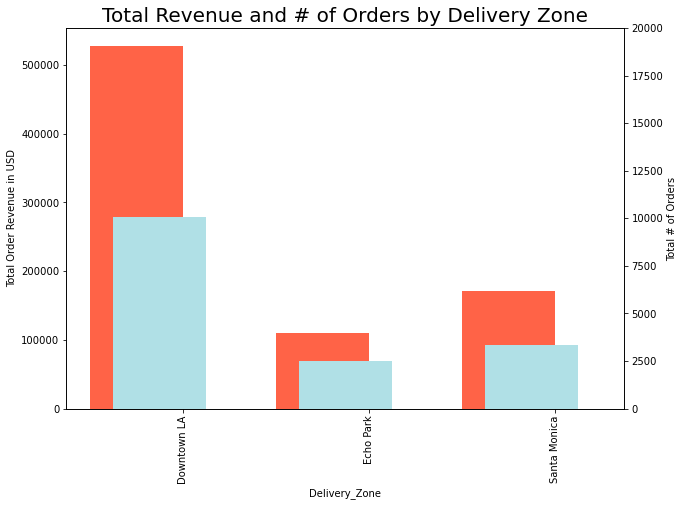

In [53]:
#Creating Quick Order Analysis by Zone
fig = plt.figure(figsize=(10,7)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx()

bar1 = Del_region.Total_Order_Amount.plot(kind='bar', color='tomato',ax=ax, position=1)
bar2 = Del_region.Number_of_Orders.plot(kind='bar',color='powderblue', ax=ax2,position=.75)

ax2.set_ylim(0,20000)

ax.set_ylabel('Total Order Revenue in USD')
ax.set_title('Total Revenue and # of Orders by Delivery Zone', size=20)
plt.xticks(rotation=45)
ax2.set_ylabel('Total # of Orders')

In [54]:
#Pulled the data to understand the the delivery platform stakeholder count (Customers, Stores, and Couriers)
del_demo = dr.groupby('Delivery_Zone')[['Customer_ID', 'Store_ID', 'Courier_ID', 'Total_order']].nunique()
del_demo

,Customer_ID,Store_ID,Courier_ID,Total_order
Delivery_Zone,,,,
Downtown LA,3852,146,235,2629
Echo Park,1222,153,89,1232
Santa Monica,1280,111,132,1202


In [55]:
#More Couriers = Order Delivery: We should do what we can to increase our Courier count
del_demo.corr()

,Customer_ID,Store_ID,Courier_ID,Total_order
Customer_ID,1.000000,0.341124,0.963415,0.999289
Store_ID,0.341124,1.000000,0.076707,0.376319
Courier_ID,0.963415,0.076707,1.000000,0.952627
Total_order,0.999289,0.376319,0.952627,1.000000


In [56]:
#Tip information based on full dataset by region
dr.groupby('Delivery_Zone')[['Tip_%','Tip']].median()

,Tip_%,Tip
Delivery_Zone,,
Downtown LA,5.28,2.475
Echo Park,8.09,3.075
Santa Monica,5.39,2.665


In [57]:
#Look at discount data based on amounts greater than 6
discount = df[['Discounted_amount','Delivery_Zone', 'Customer_ID', 'Courier_ID','Total_order','Tip', 'Tip_%']]
discount = discount[discount['Discounted_amount'] > 6]

discount.describe()

,Discounted_amount,Customer_ID,Courier_ID,Total_order,Tip,Tip_%
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,41.689184,16272.734694,223.229592,54.338878,4.141454,7.774184
std,38.446179,28760.261915,104.593736,35.590884,3.227196,4.155026
min,7.380000,5.000000,7.000000,10.200000,0.000000,0.000000
25%,12.000000,514.000000,124.500000,28.600000,1.887500,4.620000
50%,27.290000,3936.500000,246.000000,44.525000,3.410000,8.120000
75%,50.827500,12409.500000,305.500000,69.732500,5.550000,10.102500
max,163.260000,111761.000000,408.000000,168.200000,15.085000,21.880000


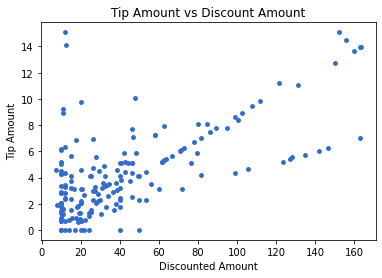

In [58]:
#Scatter plot to determine correlation
plt.scatter(x=discount["Discounted_amount"], y=discount["Tip"], s= 15,zorder=3,edgecolor="royalblue")
plt.title("Tip Amount vs Discount Amount")
plt.xlabel("Discounted Amount")
plt.ylabel("Tip Amount")
plt.savefig("Amount_of_Tip_vs_Amount_of_Discount.png")
plt.show()

In [59]:
#Pulling correlation metrics to see the correlation between tips and discounts
discount.corr()

,Discounted_amount,Customer_ID,Courier_ID,Total_order,Tip,Tip_%
Discounted_amount,1.000000,-0.243564,-0.018707,0.854337,0.666578,-0.009700
Customer_ID,-0.243564,1.000000,-0.021695,-0.149719,-0.174669,-0.101407
Courier_ID,-0.018707,-0.021695,1.000000,0.014097,-0.013450,-0.005960
Total_order,0.854337,-0.149719,0.014097,1.000000,0.764753,-0.056414
Tip,0.666578,-0.174669,-0.013450,0.764753,1.000000,0.496181
Tip_%,-0.009700,-0.101407,-0.005960,-0.056414,0.496181,1.000000


Based on initial review of discount information, there would seem to be a not be a strong correlation between tipping and discounts. However, once we cross the discount threshold of $6.00, there is a moderately positive relationship between discounted orders and tipping (this is where the correlation coefficient is 0.67)

**Reccomendation 3:** Implement a discount campaign (with a minimum order value threshold) to help increase order revenue. Discounted orders should trigger a notification to "pay discounts forward" by providing a tip to the Couriers.

In [60]:
#Understand our total population of Stores on the platform
df[['Store_ID','Customer_ID','Courier_ID']].nunique()

Store_ID        311
Customer_ID    6297
Courier_ID      295
dtype: int64

#### Store Review

In [61]:
#Script for find our top Store by total revenue
r = {
    'Total_order' : 'Order_avg',
    'Tip_%': 'Avg Tip_%', 
    'Store_ID' : 'Order_Count'
}


col = {
    'Total_order'  : 'mean',
    'Tip_%'        : 'mean',
    'Store_ID': 'count',
}

Sto = df.groupby(
    ['Store_ID'], sort=True).agg(col).round(2).rename(columns=r)
sthres=Sto[Sto['Order_Count']>1]
top_sto=sthres.sort_values(by = ['Order_Count'], ascending=[False])
top_sto
top_sto['Total_Order_revenue'] = df.groupby(['Store_ID'])['Total_order'].sum()
top_sto['Daily_Order_Revenue'] = top_sto['Total_Order_revenue'] / 30
top_sto['Daily_Order_Count'] = top_sto['Order_Count'] / 30
tsr = top_sto.sort_values(by = ['Daily_Order_Revenue'], ascending=[False])
tsr

,Order_avg,Avg Tip_%,Order_Count,Total_Order_revenue,Daily_Order_Revenue,Daily_Order_Count
Store_ID,,,,,,
9,54.41,7.19,636,34601.65,1153.388333,21.200000
8,51.03,6.56,668,34088.52,1136.284000,22.266667
63,73.75,7.19,380,28023.50,934.116667,12.666667
20,43.86,6.93,612,26842.08,894.736000,20.400000
107,52.74,7.37,440,23207.46,773.582000,14.666667
...,...,...,...,...,...,...
332,22.31,9.21,3,66.93,2.231000,0.100000
388,30.36,7.83,2,60.73,2.024333,0.066667
318,18.70,12.57,3,56.09,1.869667,0.100000


In [62]:
#Quick analysis on store population
tsr.describe()

,Order_avg,Avg Tip_%,Order_Count,Total_Order_revenue,Daily_Order_Revenue,Daily_Order_Count
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,50.624915,7.772169,54.016949,2756.109153,91.870305,1.800565
std,30.243192,1.637722,89.339925,4678.272871,155.942429,2.977997
min,18.430000,3.540000,2.000000,36.860000,1.228667,0.066667
25%,38.815000,6.740000,9.000000,411.710000,13.723667,0.300000
50%,48.220000,7.480000,23.000000,1047.420000,34.914000,0.766667
75%,56.770000,8.560000,60.500000,3191.625000,106.387500,2.016667
max,504.300000,15.260000,668.000000,34601.650000,1153.388333,22.266667


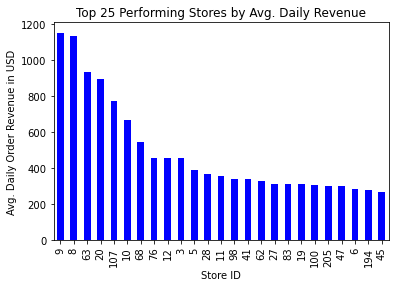

In [63]:
#Charting of Top Store by average daily revenue
tsrchart = tsr.head(25)
tsrchart.Daily_Order_Revenue.plot(kind='bar', color='blue')
plt.title("Top 25 Performing Stores by Avg. Daily Revenue")
plt.xlabel("Store ID")
plt.ylabel("Avg. Daily Order Revenue in USD")
plt.savefig('Daily_rev_store.png')

In [64]:
#Script for find our top Stores by daily order count
tsc = top_sto.sort_values(by = ['Daily_Order_Count'], ascending=[False])
tsc

,Order_avg,Avg Tip_%,Order_Count,Total_Order_revenue,Daily_Order_Revenue,Daily_Order_Count
Store_ID,,,,,,
8,51.03,6.56,668,34088.52,1136.284000,22.266667
9,54.41,7.19,636,34601.65,1153.388333,21.200000
20,43.86,6.93,612,26842.08,894.736000,20.400000
107,52.74,7.37,440,23207.46,773.582000,14.666667
12,32.47,6.81,421,13668.53,455.617667,14.033333
...,...,...,...,...,...,...
372,33.64,3.94,2,67.28,2.242667,0.066667
397,83.62,10.77,2,167.25,5.575000,0.066667
388,30.36,7.83,2,60.73,2.024333,0.066667


In [65]:
tsc.describe()

,Order_avg,Avg Tip_%,Order_Count,Total_Order_revenue,Daily_Order_Revenue,Daily_Order_Count
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,50.624915,7.772169,54.016949,2756.109153,91.870305,1.800565
std,30.243192,1.637722,89.339925,4678.272871,155.942429,2.977997
min,18.430000,3.540000,2.000000,36.860000,1.228667,0.066667
25%,38.815000,6.740000,9.000000,411.710000,13.723667,0.300000
50%,48.220000,7.480000,23.000000,1047.420000,34.914000,0.766667
75%,56.770000,8.560000,60.500000,3191.625000,106.387500,2.016667
max,504.300000,15.260000,668.000000,34601.650000,1153.388333,22.266667


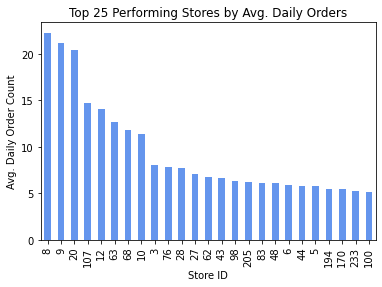

In [66]:
#Script for find our top Stores by average daily orders
tscchart = tsc.head(25)
tscchart.Daily_Order_Count.plot(kind='bar', color='cornflowerblue')
plt.title("Top 25 Performing Stores by Avg. Daily Orders")
plt.xlabel("Store ID")
plt.ylabel("Avg. Daily Order Count")
plt.savefig('Daily_count_store.png')

**Store Analysis:** Store 9, 8, 20, 63, 107, 10, and 68 were our highest performers:
- Store 9 had the highest Daily Order Revenue performance: \\$1,153.38
    - 75 Percentile has Daily Order Revenue of $106.39
- Store 8 had the highest Daily Order Quantity performance: ~22 orders per day (75% Percentile has Daily Order Count of ~2 orders)

**Recommendation 4:**  HotSnack should strengthen our partnerships with Stores by offering services to both high performing and opportunistic stores
- High-Performing Stores: Providing recognition of top Stores on the app and web portal (i.e. HotSnack Favorite) 
- Opportunistic Stores: Provide a 'How to broaden your reach' cheat sheet by providing common themes amongst the top performing stores (i.e. clear photos of snacks, clear descriptions, etc.)

#### Customer Analysis

In [67]:
#Script for find our top Consumers by order count
c = {
    'Total_order' : 'Order_avg',
    'Tip_%': 'Avg Tip_%', 
    'Customer_ID' : 'Order_Count'
}


col = {
    'Total_order'  : 'mean',
    'Tip_%'        : 'mean',
    'Customer_ID': 'count',
}

Cust = df.groupby(
    ['Customer_ID'], sort=True).agg(col).round(2).rename(columns=c)
Cust.sort_values(by = ['Order_Count'], ascending=[False])




,Order_avg,Avg Tip_%,Order_Count
Customer_ID,,,
514,78.38,7.92,61
929,195.92,4.30,45
11956,30.33,3.86,43
2469,38.33,5.84,40
4087,61.67,4.22,34
...,...,...,...
14019,27.62,25.65,1
14021,35.72,11.74,1
14022,19.46,3.31,1


In [68]:
Cust.describe()

,Order_avg,Avg Tip_%,Order_Count
count,6297.000000,6297.000000,6297.000000
mean,50.774832,7.078655,2.533111
std,56.035803,3.990193,2.998924
min,-0.130000,0.000000,1.000000
25%,28.110000,4.260000,1.000000
50%,39.530000,5.440000,1.000000
75%,56.380000,9.470000,3.000000
max,1604.000000,35.420000,61.000000


In [69]:
Cust.Order_Count.quantile(0.51)

1.0

In [70]:
Cust['Total_Order_revenue'] = df.groupby(['Customer_ID'])['Total_order'].sum()
tcr = Cust.sort_values(by = ['Total_Order_revenue'], ascending=[False])
tcr

,Order_avg,Avg Tip_%,Order_Count,Total_Order_revenue
Customer_ID,,,,
929,195.92,4.30,45,8816.20
8076,342.60,3.56,19,6509.45
3392,443.38,4.51,11,4877.19
514,78.38,7.92,61,4780.97
550,220.94,4.36,17,3755.96
...,...,...,...,...
40039,11.29,14.66,1,11.29
76747,8.29,4.89,1,8.29
86994,8.03,1.43,1,8.03


In [71]:
tcr.describe()

,Order_avg,Avg Tip_%,Order_Count,Total_Order_revenue
count,6297.000000,6297.000000,6297.000000,6297.000000
mean,50.774832,7.078655,2.533111,129.243788
std,56.035803,3.990193,2.998924,257.286542
min,-0.130000,0.000000,1.000000,-0.130000
25%,28.110000,4.260000,1.000000,36.590000
50%,39.530000,5.440000,1.000000,66.230000
75%,56.380000,9.470000,3.000000,137.800000
max,1604.000000,35.420000,61.000000,8816.200000


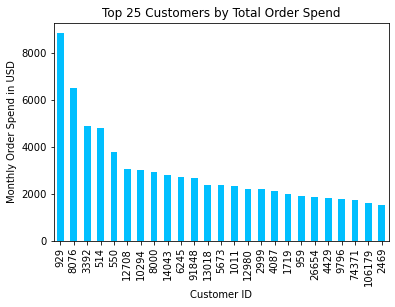

In [72]:
#Charting of Top Customers by total revenue
tcrchart = tcr.head(25)
tcrchart.Total_Order_revenue.plot(kind='bar', color='deepskyblue')
plt.title("Top 25 Customers by Total Order Spend")
plt.xlabel("Customer ID")
plt.ylabel("Monthly Order Spend in USD")
plt.savefig('total_rev_cust.png')

In [73]:
#Script for find our top Customers by order count
tcc = Cust.sort_values(by = ['Order_Count'], ascending=[False])
tcc

,Order_avg,Avg Tip_%,Order_Count,Total_Order_revenue
Customer_ID,,,,
514,78.38,7.92,61,4780.97
929,195.92,4.30,45,8816.20
11956,30.33,3.86,43,1304.36
2469,38.33,5.84,40,1533.16
4087,61.67,4.22,34,2096.72
...,...,...,...,...
14019,27.62,25.65,1,27.62
14021,35.72,11.74,1,35.72
14022,19.46,3.31,1,19.46


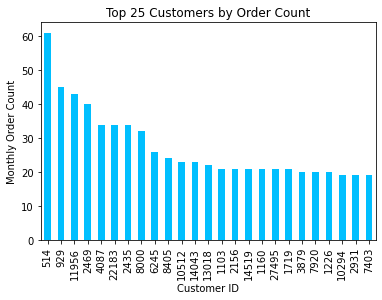

In [74]:
#Script for find our top Customers by order volume
tccchart = tcc.head(25)
tccchart.Order_Count.plot(kind='bar', color='deepskyblue')
plt.title("Top 25 Customers by Order Count")
plt.xlabel("Customer ID")
plt.ylabel("Monthly Order Count")
plt.savefig('Order_count_cust.png')

**Customer Analysis:** Customers who were our biggest revenue drivers were high volume and high order cart our highest performers:
- Customer 929 had the highest Revenue performance: 8816 USD
 - 75 Percentile of Order Spend by Customer is $137.80
- Customer 514 had the highest Order Quantity: 61 orders per month
 - 75 Percentile of Order Quantity by Customer is ~3 orders

**Reccomendation 5:** Use e-mail marketing and promotional campaigns to strengthen repeat orders on the platform.
- Promotional campaigns should:
    - Entice consumers to make 2-3 orders per month 
    - Expire within a month to drive our order rate on a monthly basis
    - Have minimum order requirement of $30 per order (~25 Percentile)

The promotional campaigns will drive more customer engagement and increase overall revenue.